In [4]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import os

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set_style('darkgrid')
import seaborn as sns
import librosa
import librosa.display
import wave

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.callbacks import ReduceLROnPlateau  , ModelCheckpoint ,EarlyStopping
from keras.models import Sequential
from keras.layers import *
from keras.utils import  to_categorical

import warnings
warnings.filterwarnings ('ignore')


In [5]:
! pip install kaggle

In [6]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"somendar","key":"1d82aec4a64ba037cebf95d751b32dfe"}'}

In [7]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d ejlok1/cremad


Dataset URL: https://www.kaggle.com/datasets/ejlok1/cremad
License(s): ODC Attribution License (ODC-By)
 99% 448M/451M [00:07<00:00, 82.1MB/s]
100% 451M/451M [00:07<00:00, 61.2MB/s]


In [9]:
!ls

cremad.zip  sample_data


In [10]:
!unzip cremad.zip -d cremad


Streaming output truncated to the last 5000 lines.
  inflating: cremad/AudioWAV/1031_DFA_DIS_XX.wav  
  inflating: cremad/AudioWAV/1031_DFA_FEA_XX.wav  
  inflating: cremad/AudioWAV/1031_DFA_HAP_XX.wav  
  inflating: cremad/AudioWAV/1031_DFA_NEU_XX.wav  
  inflating: cremad/AudioWAV/1031_DFA_SAD_XX.wav  
  inflating: cremad/AudioWAV/1031_IEO_ANG_HI.wav  
  inflating: cremad/AudioWAV/1031_IEO_ANG_LO.wav  
  inflating: cremad/AudioWAV/1031_IEO_ANG_MD.wav  
  inflating: cremad/AudioWAV/1031_IEO_DIS_HI.wav  
  inflating: cremad/AudioWAV/1031_IEO_DIS_LO.wav  
  inflating: cremad/AudioWAV/1031_IEO_DIS_MD.wav  
  inflating: cremad/AudioWAV/1031_IEO_FEA_HI.wav  
  inflating: cremad/AudioWAV/1031_IEO_FEA_LO.wav  
  inflating: cremad/AudioWAV/1031_IEO_FEA_MD.wav  
  inflating: cremad/AudioWAV/1031_IEO_HAP_HI.wav  
  inflating: cremad/AudioWAV/1031_IEO_HAP_LO.wav  
  inflating: cremad/AudioWAV/1031_IEO_HAP_MD.wav  
  inflating: cremad/AudioWAV/1031_IEO_NEU_XX.wav  
  inflating: cremad/AudioWAV/10

In [11]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio


Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
100% 429M/429M [00:03<00:00, 116MB/s]
100% 429M/429M [00:03<00:00, 125MB/s]


In [12]:
!unzip ravdess-emotional-speech-audio.zip -d ravdess

Archive:  ravdess-emotional-speech-audio.zip
  inflating: ravdess/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: ravdess/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: ravdess/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: ravdess/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: ravdess/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: ravdess/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: ravdess/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: ravdess/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: ravdess/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: ravdess/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: ravdess/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: ravdess/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: ravdess/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: ravdess/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: ravdess/Actor_01/03-01-03-01-02-01-01.wav  
  inflating: ravdess/Actor_01/03-01-03-01-02-02-01.wav  
  inflating: ravdess/Actor_01/03-01-03-02-0

In [13]:
def extract_mfcc(audio_file_path):

    y, sr = librosa.load(audio_file_path)


    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr , n_mfcc=40).T,axis= 0)

    return mfccs
w = extract_mfcc('/content/ravdess/Actor_01/03-01-01-01-01-01-01.wav')
w

array([-6.9779260e+02,  5.4890041e+01,  6.6346657e-01,  1.2435784e+01,
        7.7339525e+00,  5.3074980e-01, -3.2166309e+00, -3.1593955e+00,
       -1.0977551e+01, -2.8487113e+00,  8.1529772e-01, -3.0370667e+00,
        1.9554471e+00, -3.7356687e+00,  4.3770060e-01,  7.8235632e-01,
       -4.0714293e+00, -1.8607763e+00, -1.3236899e+00, -9.2046332e-01,
       -5.9476104e+00, -5.0543863e-01, -2.3373904e+00, -4.5227804e+00,
       -1.6797216e+00, -8.1932145e-01, -4.8584819e+00,  2.5533608e-01,
       -2.1487043e+00,  1.4505480e-01, -2.0357547e+00, -2.1196356e+00,
       -2.7125883e+00, -1.8361282e+00, -3.2048037e+00, -1.5453695e+00,
       -1.0909369e+00, -1.7701064e+00, -3.5011318e+00, -1.5380877e+00],
      dtype=float32)

In [14]:
root_dir = "/content/ravdess"

speech_data_MFCC = []  # stores the MFCC data
speech_data = []
speech_labels = []  # stores the labels

for subdirs, dirs, files in tqdm(os.walk(root_dir), desc="Processing audio files", unit="file"):
    for file in files:
        speech_labels.append(int(file[7:8]) - 1)
        audio_file_path = os.path.join(subdirs, file)
        speech_data.append(audio_file_path)
        speech_data_MFCC.append(extract_mfcc(audio_file_path))



Processing audio files: 0file [00:00, ?file/s]

In [15]:
speech_data[0]

'/content/ravdess/Actor_13/03-01-07-02-02-01-13.wav'

In [16]:
speech_data_MFCC[0]

array([-7.1229535e+02,  6.8963058e+01,  1.4398189e+01,  1.0866857e+01,
        6.7635384e+00,  3.8003042e+00,  6.8012780e-01, -2.5770411e+00,
       -2.4538286e+00,  6.4767443e-02,  1.1219314e+00, -2.5684825e-01,
        5.6910486e+00,  4.5590350e-01, -1.3717222e-01,  2.4699018e+00,
       -3.1349576e+00,  1.9951164e+00,  1.2152970e+00, -1.0199132e+00,
       -1.8102815e+00, -1.4269623e+00, -1.6882422e+00,  5.5229861e-01,
       -2.7754183e+00,  1.1359155e+00, -1.0824836e+00, -3.6855814e-01,
        2.4309987e-01, -1.4718404e-01, -8.0993891e-01,  1.0969762e+00,
       -4.1101453e-01, -9.6140869e-02,  2.4652778e-01,  4.9390146e-01,
       -7.9301453e-01, -4.9140069e-01, -2.2569435e+00, -9.6643960e-01],
      dtype=float32)

In [17]:
speech_labels[0]

6

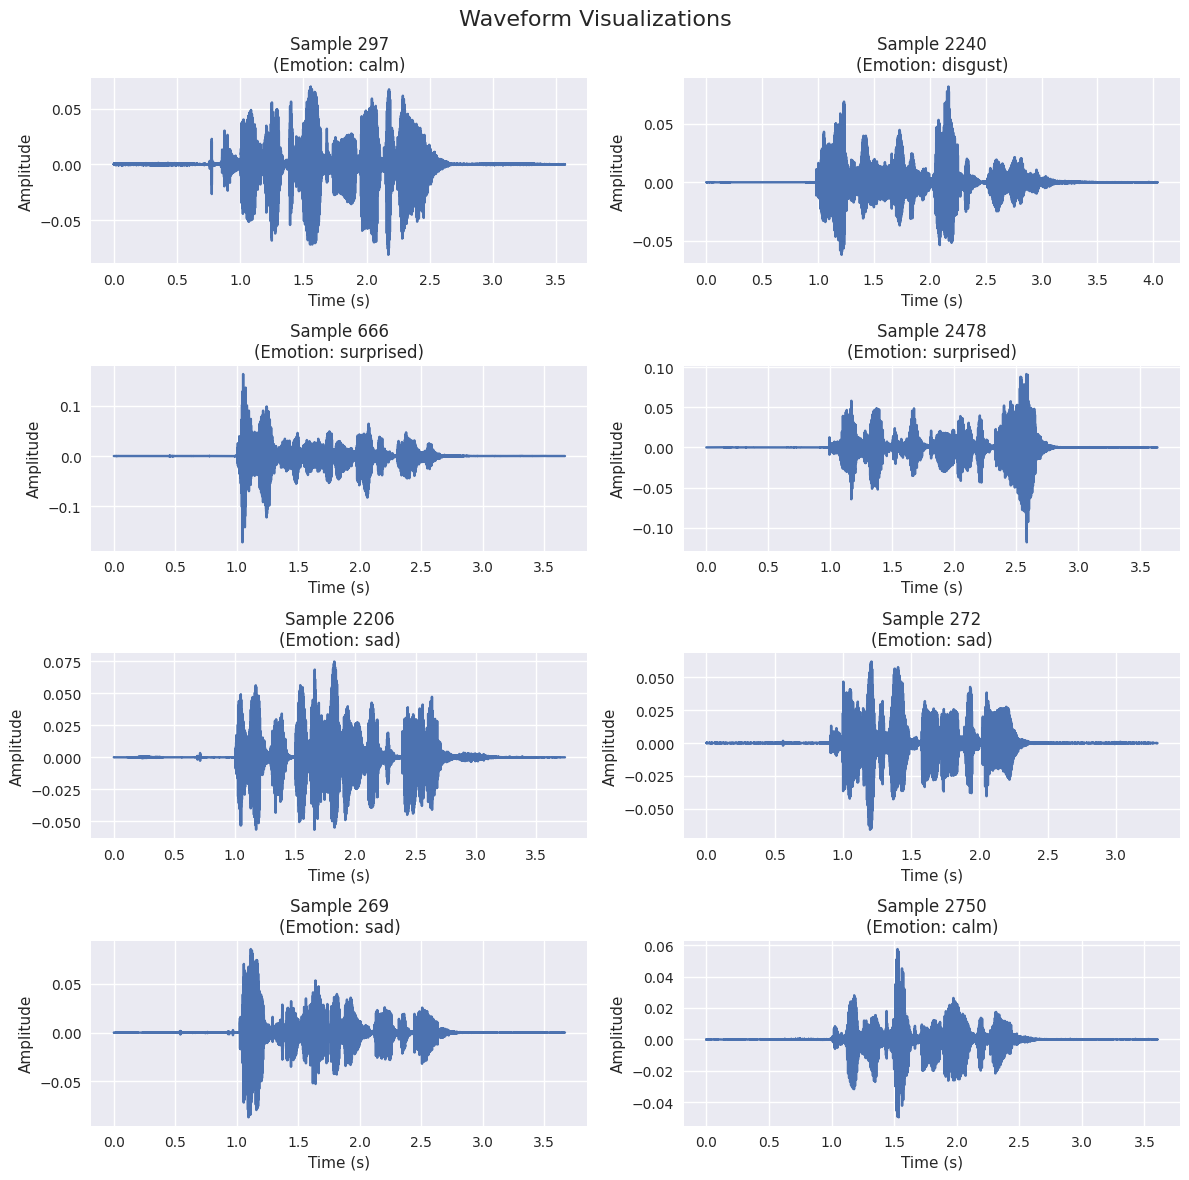

In [18]:
emotion_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

sample_indices = np.random.choice(len(speech_data), size=8, replace=False)

num_rows = 4
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

fig.suptitle("Waveform Visualizations", fontsize=16)

# Visualize the selected samples
for i, index in enumerate(sample_indices):
    row = i // num_cols
    col = i % num_cols

    audio_data, sr = librosa.load(speech_data[index])
    label_index = speech_labels[index]
    emotion = emotion_labels[label_index]

    duration = len(audio_data) / sr
    time = np.linspace(0, duration, num=len(audio_data))

    ax = axes[row, col]
    ax.plot(time, audio_data)
    ax.set_title(f"Sample {index+1}\n(Emotion: {emotion})")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Amplitude")



plt.tight_layout()
plt.show()

In [19]:
speech_data_array = np.asarray(speech_data_MFCC)
speech_label_array = np.array(speech_labels)

In [20]:
speech_label_array.shape

(2880,)

In [21]:
speech_data_array.shape

(2880, 40)

In [22]:
labels_cat = to_categorical(speech_label_array)

In [23]:
labels_cat.shape

(2880, 8)

In [24]:
# Split the training, validating, and testing sets
number_of_samples = speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples* 0.1)
test_samples= int(number_of_samples* 0.1)

In [25]:
x_train = speech_data_array[:training_samples]
y_train = labels_cat[:training_samples]
x_valid = speech_data_array[training_samples:training_samples+validation_samples]
y_valid = labels_cat[training_samples:training_samples+validation_samples]

In [26]:
x_train.shape

(2304, 40)

In [27]:
x_train = np.expand_dims(x_train , -1)
x_valid = np.expand_dims(x_valid , -1)

In [28]:
x_valid.shape

(288, 40, 1)

In [29]:
# Define the LSTM model
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Activation ('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))
    # Configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['categorical_accuracy'])
    return model

In [34]:
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.1, patience=2),
    ModelCheckpoint('Emotion_model.keras', save_best_only=True , monitor = 'val_categorical_accuracy')
]

In [35]:
model = create_model_LSTM()
history = model.fit(x_train, y_train,
                    validation_data=(x_valid, y_valid),
                    epochs=140,
                    callbacks=callbacks ,
                    shuffle = True)

Epoch 1/140
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - categorical_accuracy: 0.1697 - loss: 2.0432 - val_categorical_accuracy: 0.2535 - val_loss: 1.9093 - learning_rate: 0.0010
Epoch 2/140
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.2736 - loss: 1.8518 - val_categorical_accuracy: 0.3021 - val_loss: 1.7816 - learning_rate: 0.0010
Epoch 3/140
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.3090 - loss: 1.7696 - val_categorical_accuracy: 0.3889 - val_loss: 1.7066 - learning_rate: 0.0010
Epoch 4/140
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.3410 - loss: 1.7406 - val_categorical_accuracy: 0.3542 - val_loss: 1.6847 - learning_rate: 0.0010
Epoch 5/140
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.3137 - loss: 1.7220 - val_categorical_accuracy: 0.3507 - val_loss: 1.6899 - learning_rate: 0.0010
Epoch 6/140
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.3331 - loss: 1.7103 - val_categorical_accuracy:

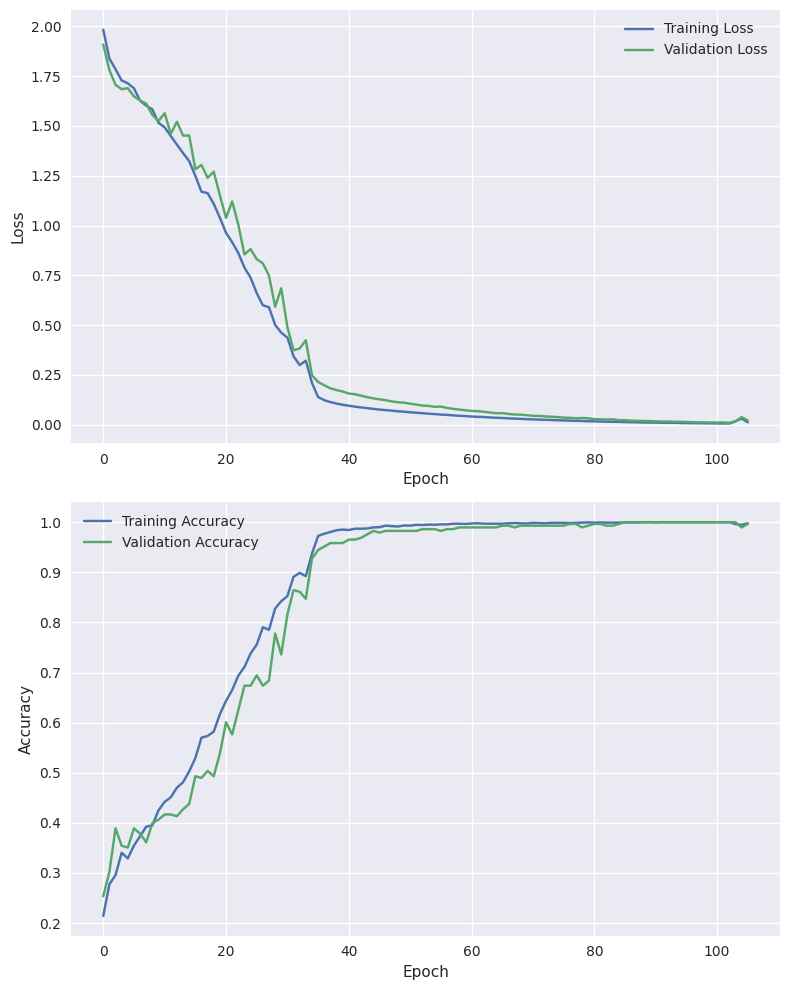

In [36]:
# Create a DataFrame from the history history
history_frame = pd.DataFrame(history.history)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Plot loss and val_loss
axs[0].plot(history_frame['loss'], label='Training Loss')
axs[0].plot(history_frame['val_loss'], label='Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot categorical_accuracy and val_categorical_accuracy
axs[1].plot(history_frame['categorical_accuracy'], label='Training Accuracy')
axs[1].plot(history_frame['val_categorical_accuracy'], label='Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [37]:
x_test = speech_data_array[training_samples+validation_samples:]
y_test = labels_cat[training_samples+validation_samples:]

In [38]:
x_test = np.expand_dims(x_test , -1)

In [39]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 1.0000 - loss: 0.0085 
Test Loss: 0.009284536354243755
Test Accuracy: 1.0


In [40]:
from tensorflow.keras.models import load_model, save_model

# Assuming you have a trained Keras model called 'model'
model.save('Emodel.h5')


In [43]:
Emotion = load_model('Emodel.h5')

In [44]:
test_loss, test_acc = Emotion.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 1.0000 - loss: 0.0085  
Test Loss: 0.009284536354243755
Test Accuracy: 1.0


In [45]:
X_new = x_test
y_proba = model.predict(X_new)
y_proba.round(2)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


array([[0.  , 0.  , 0.98, ..., 0.  , 0.01, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.01, 0.99, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.99, 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [46]:

len(X_new)

288

In [47]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([2, 1, 4, 1, 6, 7, 6, 0, 6, 2, 0, 7, 2, 1, 6, 2, 4, 4, 5, 4, 6, 5,
       3, 0, 5, 5, 7, 6, 6, 5, 1, 1, 5, 7, 4, 7, 3, 3, 3, 1, 5, 3, 4, 7,
       2, 3, 7, 0, 6, 0, 2, 0, 7, 1, 7, 3, 6, 6, 3, 4, 0, 4, 3, 6, 3, 2,
       4, 2, 4, 1, 5, 3, 4, 1, 1, 5, 1, 1, 6, 5, 2, 3, 7, 3, 2, 2, 0, 5,
       4, 7, 7, 1, 3, 5, 2, 7, 6, 1, 5, 5, 6, 7, 2, 4, 6, 4, 7, 5, 3, 7,
       1, 4, 2, 1, 2, 1, 6, 6, 5, 4, 0, 5, 5, 6, 1, 5, 0, 3, 5, 0, 7, 1,
       4, 2, 5, 4, 4, 3, 2, 3, 7, 6, 7, 3, 5, 1, 6, 3, 2, 6, 1, 7, 6, 3,
       7, 5, 3, 1, 4, 4, 0, 7, 2, 6, 7, 2, 4, 2, 4, 6, 5, 6, 6, 1, 1, 1,
       4, 4, 7, 2, 1, 2, 3, 0, 2, 0, 2, 5, 2, 3, 5, 3, 7, 1, 7, 4, 6, 4,
       3, 7, 7, 2, 2, 3, 5, 0, 4, 6, 7, 1, 3, 7, 4, 3, 5, 7, 3, 1, 6, 5,
       5, 4, 2, 0, 6, 1, 6, 5, 6, 5, 3, 7, 7, 6, 4, 2, 3, 4, 1, 1, 4, 6,
       1, 3, 2, 3, 1, 2, 0, 7, 7, 1, 6, 2, 5, 2, 5, 3, 7, 5, 5, 1, 2, 5,
       4, 3, 7, 4, 7, 3, 6, 4, 1, 2, 6, 4, 5, 0, 3, 6, 2, 5, 4, 6, 7, 1,
       0, 0])

In [48]:
y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [49]:
y_test = [np.argmax(sample) for sample in y_test]

In [50]:
len(y_test)

288

In [51]:
from sklearn.metrics import confusion_matrix

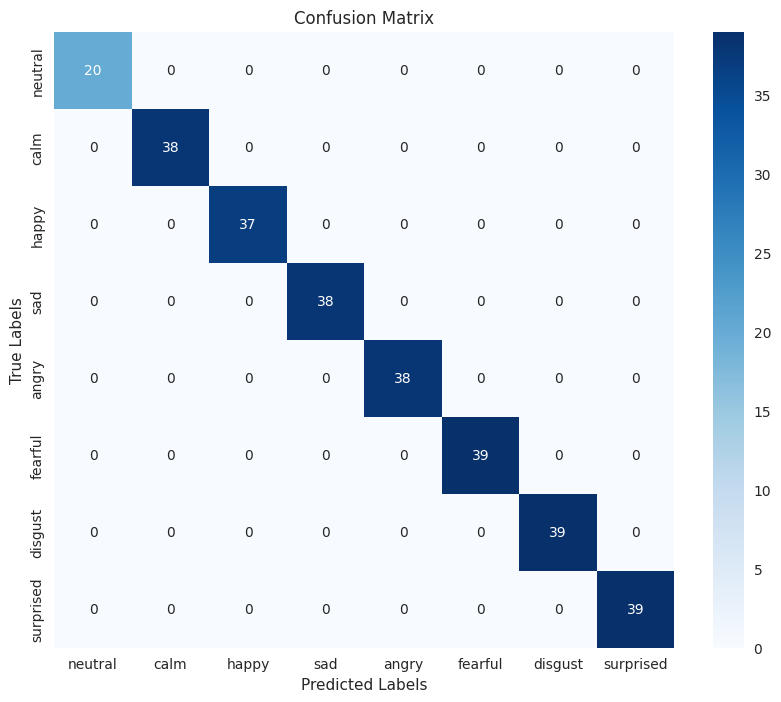

In [52]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised'],
            yticklabels=['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [53]:
! pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [54]:
import streamlit as st

In [55]:
emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

# Function to extract MFCC features
def extract_mfcc(wav_file_name):
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfccs

# Function to predict emotion
def predict_emotion(Emotion, wav_filepath):
    test_point = extract_mfcc(wav_filepath)
    test_point = np.reshape(test_point, newshape=(1, 40, 1))
    predictions = Emotion.predict(test_point)
    predicted_emotion = emotions[np.argmax(predictions[0]) + 1]
    return predicted_emotion
